In [61]:
import pandas as pd

# Path to your downloaded excel from Wyscout
excel_file_path = '/Users/marclambertes/Downloads/Database Men 2024-2025/Netherlands.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

# List of metrics you want to keep
metrics_to_keep = ['Player','Team', 'Position', 'Age', 'Matches played', 'Minutes played','Goals per 90', 'xG per 90', 'Shots on target, %', 'Dribbles per 90', 'Progressive runs per 90',
                  'Defensive duels won, %', 'Aerial duels won, %', 'PAdj Sliding tackles', 'PAdj Interceptions', 'Shots blocked per 90',
                  'xA per 90', 'Key passes per 90', 'Passes to final third per 90', 'Passes to penalty area per 90', 'Through passes per 90', 'Progressive passes per 90']

filtered_df = df[metrics_to_keep]

filtered_df.rename(columns={
    'Goals per 90': 'Goals',
    'xG per 90': 'xG',
    'Dribbles per 90': 'Dribbles',
    'Progressive runs per 90': 'Prog. runs',
    'Defensive duels won, %': 'Def. duels%',
    'Aerial duels won, %': 'Aerial duels %',
    'PAdj Sliding tackles': 'PAdj tackles',
    'Shots blocked per 90': 'Shots blocked',
    'xA per 90': 'xA',
    'Key passes per 90': 'Key passes',
    'Passes to final third per 90': 'Passes final 3rd',
    'Passes to penalty area per 90': 'Passes to box',
    'Through passes per 90': 'Through pass',
    'Progressive passes per 90': 'Prog. passes'
                           }, inplace=True)


# Type the desired name for the new Excel file
output_excel_file = '/Users/marclambertes/Downloads/NEW.xlsx'

# Save the filtered DataFrame to a new Excel file
filtered_df.to_excel(output_excel_file, index=False)

print(f"Filtered DataFrame saved to {output_excel_file}")


/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_93038/3138928441.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={


Filtered DataFrame saved to /Users/marclambertes/Downloads/NEW.xlsx


Scores for T. Parrott: [92.0, 52.5, 84.2, 65.0]


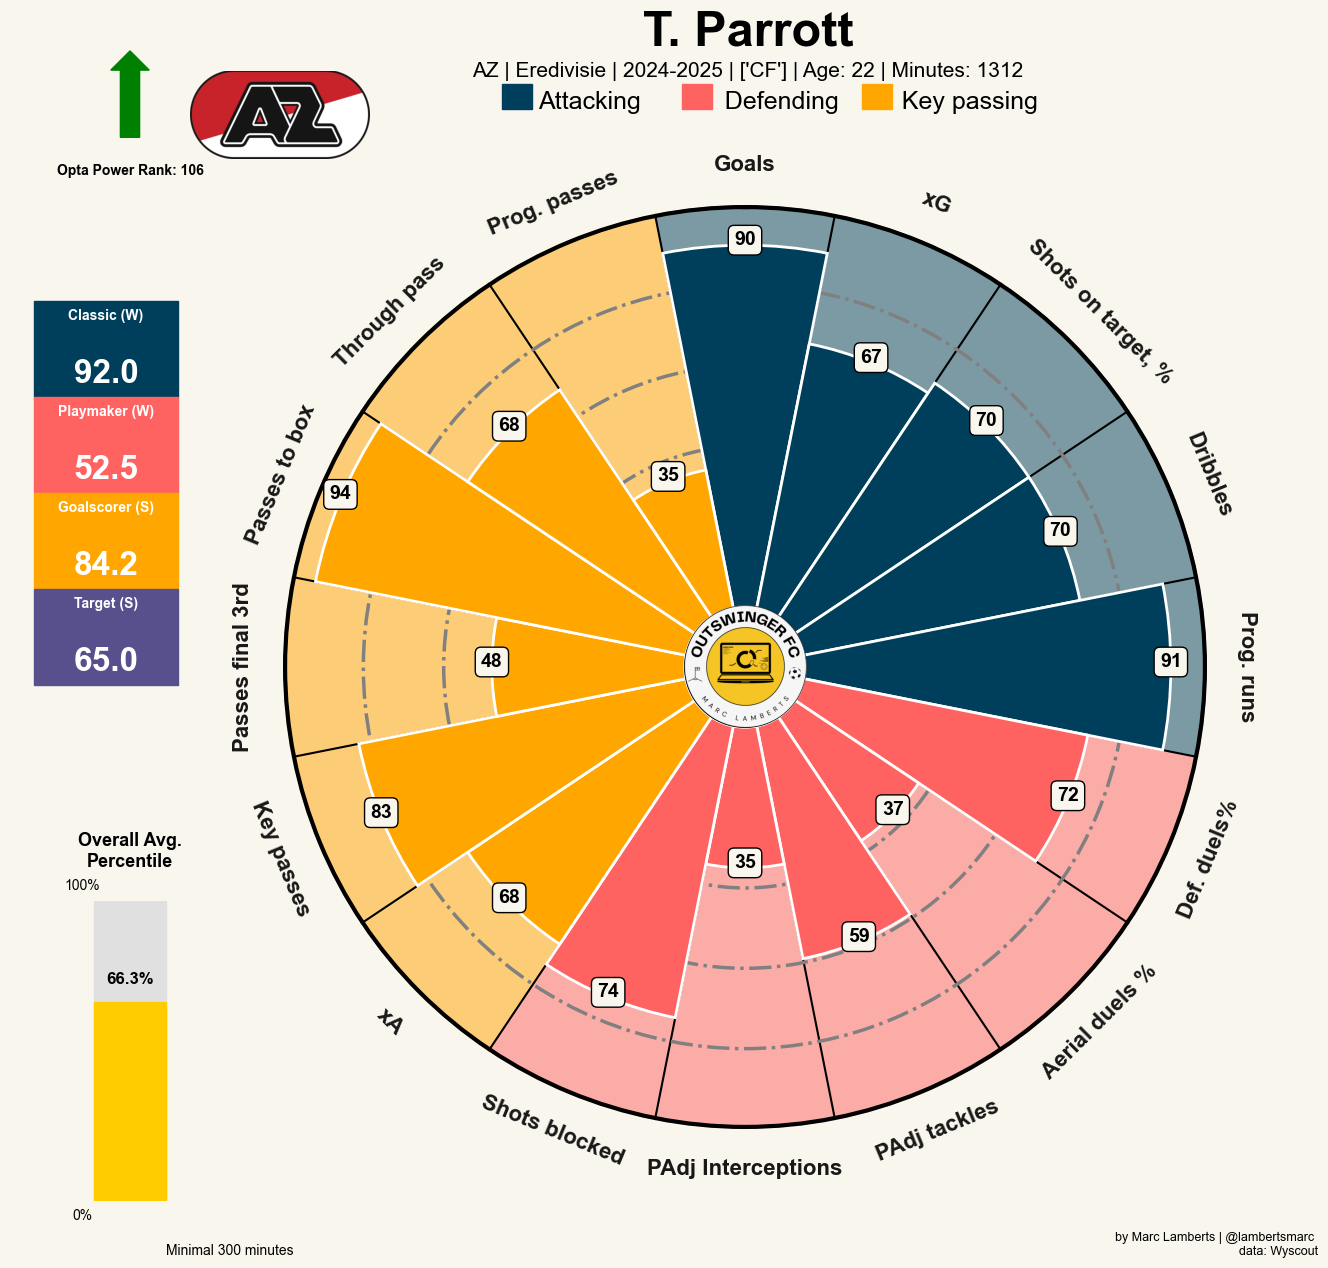

In [122]:
import pandas as pd
import numpy as np
from scipy import stats
import math
from mplsoccer import PyPizza, add_image
import matplotlib.pyplot as plt

# Hardcode inputs
player_name = "T. Parrott"    # Player's name
league_name = "Eredivisie"        # League name
season_name = "2024-2025"        # Season

# Load data from Excel file
df_original = pd.read_excel('/Users/marclambertes/Downloads/NEW.xlsx')

# Filter based on minutes played and position
df_filtered = df_original[df_original['Minutes played'] >= 90]
positions_to_filter = ['CF']
df_filtered = df_filtered[df_filtered['Position'].isin(positions_to_filter)]

# Retrieve the team name before dropping
player_team = df_filtered.loc[df_filtered['Player'] == player_name, 'Team'].values[0]

# Retrieve the player's minutes played and age from the original df
player_minutes = df_original.loc[df_original['Player'] == player_name, 'Minutes played'].values[0]
player_age = df_original.loc[df_original['Player'] == player_name, 'Age'].values[0]

# Drop the columns you don't want
df = df_filtered.drop(['Team', 'Position', 'Age', 'Matches played', 'Minutes played'], axis=1).reset_index()

# Create a parameter list
params = list(df.columns)
params = params[2:]  # skip the 'index' and 'Player' columns

# Select the player data
player_df = df.loc[df['Player'] == player_name].reset_index()
player = list(player_df.loc[0])

# Drop first 3 items to align with params
player = player[3:]

# Calculate percentile values
values = [math.floor(stats.percentileofscore(df[param], player[i])) for i, param in enumerate(params)]
values = [99 if v == 100 else v for v in values]

# Calculate the overall average percentile
average_percentile = round(np.mean(values), 1)

# Initialize PyPizza
baker = PyPizza(
    params=params,
    straight_line_color="black",
    straight_line_lw=1.5,
    last_circle_lw=6,
    other_circle_lw=2.5,
    other_circle_ls="-.",
    inner_circle_size=15
)

# Slice colors and text colors
slice_colors = ["#003f5c"] * 5 + ["#ff6361"] * 5 + ["#ffa600"] * 6
text_colors = ["#000000"] * 8 + ["white"] * 5

# Load your logo
logo_image = plt.imread('/Users/marclambertes/Downloads/Outswinger FC (3).png')

# Plot pizza
fig, ax = baker.make_pizza(
    values,
    figsize=(12, 12),
    param_location=110,
    color_blank_space="same",
    slice_colors=slice_colors,
    kwargs_slices=dict(
        edgecolor="white",
        zorder=2,
        linewidth=2
    ),
    kwargs_params=dict(
        color="black", fontsize=16, weight='bold', fontname="Arial",
        va="center", alpha=.9
    ),
    kwargs_values=dict(
        color="black", fontsize=14, weight='bold', fontname="Arial",
        zorder=3,
        bbox=dict(
            edgecolor="black",
            facecolor="#F9F6EE",
            boxstyle="round,pad=0.3",
            lw=1
        )
    )
)

# Set background to white
fig.patch.set_facecolor('#F9F6EE')
ax.set_facecolor('#F9F6EE')

# Add the logo inside the inner circle
add_image(logo_image, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127, zorder=15)

# --- TITLE TEXT ---
# Big title: Player name
fig.text(
    0.515,
    0.97,
    f"{player_name}\n",
    size=35,
    ha="center",
    color="black",
    weight="bold",
    fontname="Arial",
)

# Second line: Team, league, season, position, age, and minutes
fig.text(
    0.515, 0.95, 
    f"{player_team} | {league_name} | {season_name} | {positions_to_filter} | Age: {player_age} | Minutes: {player_minutes}\n\n",
    size=15, ha="center", color="black", fontname="Arial"
)

# Footer text
fig.text(0.03, 0.005, "Minimal 300 minutes", color="black", fontname="Arial")

# Add credits
CREDIT_1 = "by Marc Lamberts | @lambertsmarc \ndata: Wyscout"
fig.text(0.99, 0.005, f"{CREDIT_1}", size=9, color="black", ha="right", fontname="Arial")

# Label text for categories
fig.text(
    0.34, 0.96, "Attacking            Defending         Key passing", size=18, color="black", fontname="Arial"
)

# Colored rectangles for sections
fig.patches.extend([
    plt.Rectangle((0.31, 0.96), 0.025, 0.021, fill=True, color="#003f5c", transform=fig.transFigure, figure=fig),
    plt.Rectangle((0.46, 0.96), 0.025, 0.021, fill=True, color="#ff6361", transform=fig.transFigure, figure=fig),
    plt.Rectangle((0.61, 0.96), 0.025, 0.021, fill=True, color="#ffa600", transform=fig.transFigure, figure=fig)
])

# Add a bar graph for the overall average percentile in the bottom-left corner
# Adjust the position of the inset axis
bar_ax = fig.add_axes([-0.1, 0.05, 0.2, 0.25])  # [left, bottom, width, height]
bar_ax.set_xlim(0, 1)  # Scale x-axis for consistent layout
bar_ax.set_ylim(0, 100)  # Percentile range (0-100%)

# Remove axis lines and ticks for a clean look
bar_ax.axis("off")

# Determine the color based on the average percentile
# Use red for low percentiles, gold for medium, green for high
if average_percentile < 50:
    bar_color = "#ff0000"  # Red
elif 50 <= average_percentile < 75:
    bar_color = "#ffcc00"  # Gold
else:
    bar_color = "#00cc00"  # Green

# Draw the background bar for the full range (0-100%)
bar_ax.add_patch(Rectangle(
    (0.35, 0),  # Bottom-left corner of the bar
    width=0.3,  # Wider bar width
    height=100,  # Full height for 100%
    color="#e0e0e0",  # Light gray for the unfilled background
    zorder=5
))

# Draw the filled bar for the average percentile
bar_ax.add_patch(Rectangle(
    (0.35, 0),  # Bottom-left corner of the filled section
    width=0.3,  # Wider bar width
    height=average_percentile,  # Filled height proportional to the percentile
    color=bar_color,  # Dynamic color based on percentile
    zorder=6
))

# Add text to display the average percentile
bar_ax.text(
    0.5,  # Center of the bar
    average_percentile + 5,  # Position text slightly above the filled bar
    f"{average_percentile}%",  # Display the percentile value
    ha="center", va="bottom",  # Center-align the text
    fontsize=12, color="black", weight="bold", fontname="Arial", zorder=7
)

# Add labels for 0% and 100% below and above the bar graph
bar_ax.text(0.3, -5, "0%", ha="center", va="center", fontsize=10, color="black", fontname="Arial", zorder=7)
bar_ax.text(0.3, 105, "100%", ha="center", va="center", fontsize=10, color="black", fontname="Arial", zorder=7)

# Add title for the bar graph
bar_ax.text(0.5, 110, "Overall Avg.\nPercentile", ha="center", va="bottom",
            fontsize=13, color="black", weight="bold", fontname="Arial", zorder=7)

# Load the z-scores from the second Excel file
# Load the z-scores from the second Excel file
z_scores_df = pd.read_excel('/Users/marclambertes/Python/z_scores_combined.xlsx')

# Filter the scores for the selected player
z_scores_player = z_scores_df[z_scores_df['Player'] == player_name]

# Ensure the player exists in the z-scores data
if z_scores_player.empty:
    raise ValueError(f"Player {player_name} not found in z-scores data!")

# Define metrics and remove "(0-100)" for display purposes
scores_to_show = [
    "Classic winger (0-100)", "Playmaker winger (0-100)", 
    "Goalscoring striker (0-100)", "Target striker (0-100)"
]
# Extract only the role names without "(0-100)"
display_scores_to_show = [role.split(" (")[0] for role in scores_to_show]

# Format the role names for compact display inside the squares
compact_role_names = [
    "Classic (W)", "Playmaker (W)", 
    "Goalscorer (S)", "Target (S)"
]

# Extract the scores for the specified roles
scores = [round(z_scores_player[role].values[0], 1) for role in scores_to_show]

# Debugging: Print the extracted scores
print(f"Scores for {player_name}: {scores}")

# Format the role names for compact display inside the squares
compact_role_names = [
    "Classic (W)", "Playmaker (W)", 
    "Goalscorer (S)", "Target (S)"
]

# Define tile positions and dimensions relative to the main figure (higher positions and less wide)
# Define tile positions and dimensions relative to the main figure (move tiles even higher)
tile_positions = [(-0.08, 0.72), (-0.08, 0.64), (-0.08, 0.56), (-0.08, 0.48)]  # Higher y positions
tile_width, tile_height = 0.12, 0.08  # Width and height of each tile
tile_colors = ["#003f5c", "#ff6361", "#ffa600", "#58508d"]  # Tile colors

# Add tiles for the scores much higher above the bar graph
for i, (score, pos) in enumerate(zip(scores, tile_positions)):
    # Draw tile background
    fig.patches.append(plt.Rectangle(
        (pos[0], pos[1]),  # Bottom-left corner of the tile
        tile_width, tile_height,  # Width and height
        color=tile_colors[i],  # Tile color
        transform=fig.transFigure,  # Relative to figure
        zorder=5
    ))
    # Add role name text (small size)
    fig.text(
        pos[0] + tile_width / 2, pos[1] + tile_height / 1.3,  # Center of the tile for role name
        f"{compact_role_names[i]}",  # Role name
        ha="center", va="bottom", fontsize=10,  # Smaller font size
        color="white", fontname="Arial", weight="bold", zorder=6
    )
    # Add score text (larger size)
    fig.text(
        pos[0] + tile_width / 2, pos[1] + tile_height / 2.5,  # Slightly below the role name
        f"{score}",  # Only the score
        ha="center", va="top", fontsize=24,  # Larger font size
        color="white", fontname="Arial", weight="bold", zorder=6
    )
    
from PIL import Image
import os
from matplotlib.patches import FancyArrow

# Define the path to the team logo based on the player's team name
team_logo_path = os.path.join('/Users/marclambertes/Downloads/Images', f"{player_team}.png")

# Check if the team logo exists, and raise an error if not
if not os.path.exists(team_logo_path):
    raise FileNotFoundError(f"Team logo for {player_team} not found at {team_logo_path}")

# Load the team logo
team_logo = plt.imread(team_logo_path)

# Add the team logo to the top-left corner, slightly higher and to the right
add_image(
    team_logo,  # Image array
    fig,  # Matplotlib figure
    left=0.05,  # Slightly further to the right
    bottom=0.88,  # Slightly higher position
    width=0.15,  # Slightly wider logo
    height=0.15,  # Slightly taller logo
    zorder=20  # Ensure the logo is on top
)

# Add a green arrow pointing up to the left of the logo
arrow_ax = fig.add_axes([-0.04, 0.93, 0.08, 0.08])  # Adjusted for the new logo position
arrow_ax.axis("off")  # Hide axes for the arrow

# Draw the arrow
arrow = FancyArrow(
    0.5, 0.08,  # Base of the arrow (x, y)
    0, 0.7,  # Arrow direction (dx, dy)
    width=0.2,  # Width of the arrow body
    head_width=0.4,  # Width of the arrowhead
    head_length=0.2,  # Length of the arrowhead
    color="green",  # Arrow color
    zorder=21  # Ensure it appears above other elements
)
arrow_ax.add_patch(arrow)

# Add text under the arrow
arrow_ax.text(
    0.5, -0.2,  # Position below the arrow (x, y in axis coordinates)
    "Opta Power Rank: 106",  # Text to display
    ha="center", va="top",  # Center-align horizontally, top-align vertically
    fontsize=10, color="black", weight="bold", fontname="Arial", zorder=22
)

# Save and show
plt.savefig('/Users/marclambertes/Downloads/player_pizza_chart_with_opta_rank.png', dpi=500, bbox_inches='tight', facecolor='#F9F6EE')
plt.show()


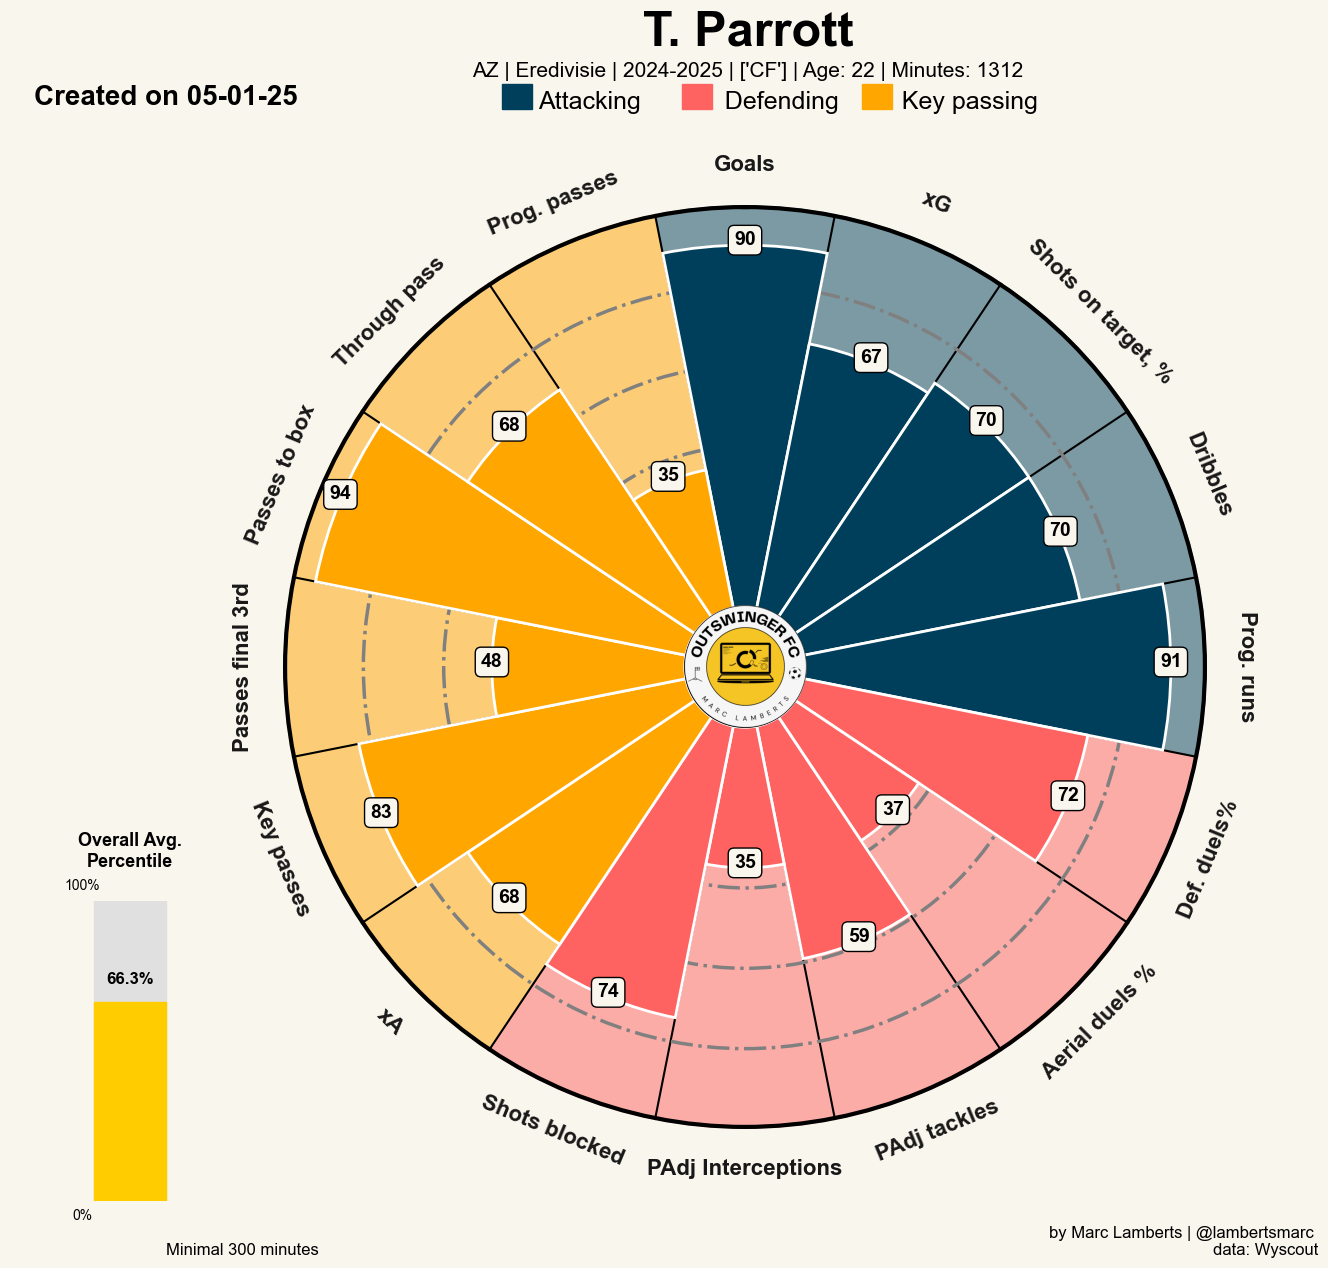

In [129]:
import pandas as pd
import numpy as np
from scipy import stats
import math
from mplsoccer import PyPizza, add_image
import matplotlib.pyplot as plt

# Hardcode inputs
player_name = "T. Parrott"    # Player's name
league_name = "Eredivisie"        # League name
season_name = "2024-2025"        # Season

# Load data from Excel file
df_original = pd.read_excel('/Users/marclambertes/Downloads/NEW.xlsx')

# Filter based on minutes played and position
df_filtered = df_original[df_original['Minutes played'] >= 90]
positions_to_filter = ['CF']
df_filtered = df_filtered[df_filtered['Position'].isin(positions_to_filter)]

# Retrieve the team name before dropping
player_team = df_filtered.loc[df_filtered['Player'] == player_name, 'Team'].values[0]

# Retrieve the player's minutes played and age from the original df
player_minutes = df_original.loc[df_original['Player'] == player_name, 'Minutes played'].values[0]
player_age = df_original.loc[df_original['Player'] == player_name, 'Age'].values[0]

# Drop the columns you don't want
df = df_filtered.drop(['Team', 'Position', 'Age', 'Matches played', 'Minutes played'], axis=1).reset_index()

# Create a parameter list
params = list(df.columns)
params = params[2:]  # skip the 'index' and 'Player' columns

# Select the player data
player_df = df.loc[df['Player'] == player_name].reset_index()
player = list(player_df.loc[0])

# Drop first 3 items to align with params
player = player[3:]

# Calculate percentile values
values = [math.floor(stats.percentileofscore(df[param], player[i])) for i, param in enumerate(params)]
values = [99 if v == 100 else v for v in values]

# Calculate the overall average percentile
average_percentile = round(np.mean(values), 1)

# Initialize PyPizza
baker = PyPizza(
    params=params,
    straight_line_color="black",
    straight_line_lw=1.5,
    last_circle_lw=6,
    other_circle_lw=2.5,
    other_circle_ls="-.",
    inner_circle_size=15
)

# Slice colors and text colors
slice_colors = ["#003f5c"] * 5 + ["#ff6361"] * 5 + ["#ffa600"] * 6
text_colors = ["#000000"] * 8 + ["white"] * 5

# Load your logo
logo_image = plt.imread('/Users/marclambertes/Downloads/Outswinger FC (3).png')

# Plot pizza
fig, ax = baker.make_pizza(
    values,
    figsize=(12, 12),
    param_location=110,
    color_blank_space="same",
    slice_colors=slice_colors,
    kwargs_slices=dict(
        edgecolor="white",
        zorder=2,
        linewidth=2
    ),
    kwargs_params=dict(
        color="black", fontsize=16, weight='bold', fontname="Arial",
        va="center", alpha=.9
    ),
    kwargs_values=dict(
        color="black", fontsize=14, weight='bold', fontname="Arial",
        zorder=3,
        bbox=dict(
            edgecolor="black",
            facecolor="#F9F6EE",
            boxstyle="round,pad=0.3",
            lw=1
        )
    )
)

# Set background to white
fig.patch.set_facecolor('#F9F6EE')
ax.set_facecolor('#F9F6EE')

# Add the logo inside the inner circle
add_image(logo_image, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127, zorder=15)

# --- TITLE TEXT ---
# Big title: Player name
fig.text(
    0.515,
    0.97,
    f"{player_name}\n",
    size=35,
    ha="center",
    color="black",
    weight="bold",
    fontname="Arial",
)

# Second line: Team, league, season, position, age, and minutes
fig.text(
    0.515, 0.95, 
    f"{player_team} | {league_name} | {season_name} | {positions_to_filter} | Age: {player_age} | Minutes: {player_minutes}\n\n",
    size=15, ha="center", color="black", fontname="Arial"
)

# Footer text
fig.text(0.03, 0.005, "Minimal 300 minutes", size=12, color="black", fontname="Arial")

# Add credits
CREDIT_1 = "by Marc Lamberts | @lambertsmarc \ndata: Wyscout"
fig.text(0.99, 0.005, f"{CREDIT_1}", size=12, color="black", ha="right", fontname="Arial")

# Label text for categories
fig.text(
    0.34, 0.96, "Attacking            Defending         Key passing", size=18, color="black", fontname="Arial"
)

# Colored rectangles for sections
fig.patches.extend([
    plt.Rectangle((0.31, 0.96), 0.025, 0.021, fill=True, color="#003f5c", transform=fig.transFigure, figure=fig),
    plt.Rectangle((0.46, 0.96), 0.025, 0.021, fill=True, color="#ff6361", transform=fig.transFigure, figure=fig),
    plt.Rectangle((0.61, 0.96), 0.025, 0.021, fill=True, color="#ffa600", transform=fig.transFigure, figure=fig)
])

# Add a bar graph for the overall average percentile in the bottom-left corner
# Adjust the position of the inset axis
bar_ax = fig.add_axes([-0.1, 0.05, 0.2, 0.25])  # [left, bottom, width, height]
bar_ax.set_xlim(0, 1)  # Scale x-axis for consistent layout
bar_ax.set_ylim(0, 100)  # Percentile range (0-100%)

# Remove axis lines and ticks for a clean look
bar_ax.axis("off")

# Determine the color based on the average percentile
# Use red for low percentiles, gold for medium, green for high
if average_percentile < 50:
    bar_color = "#ff0000"  # Red
elif 50 <= average_percentile < 75:
    bar_color = "#ffcc00"  # Gold
else:
    bar_color = "#00cc00"  # Green

# Draw the background bar for the full range (0-100%)
bar_ax.add_patch(Rectangle(
    (0.35, 0),  # Bottom-left corner of the bar
    width=0.3,  # Wider bar width
    height=100,  # Full height for 100%
    color="#e0e0e0",  # Light gray for the unfilled background
    zorder=5
))

# Draw the filled bar for the average percentile
bar_ax.add_patch(Rectangle(
    (0.35, 0),  # Bottom-left corner of the filled section
    width=0.3,  # Wider bar width
    height=average_percentile,  # Filled height proportional to the percentile
    color=bar_color,  # Dynamic color based on percentile
    zorder=6
))

# Add text to display the average percentile
bar_ax.text(
    0.5,  # Center of the bar
    average_percentile + 5,  # Position text slightly above the filled bar
    f"{average_percentile}%",  # Display the percentile value
    ha="center", va="bottom",  # Center-align the text
    fontsize=12, color="black", weight="bold", fontname="Arial", zorder=7
)

# Add labels for 0% and 100% below and above the bar graph
bar_ax.text(0.3, -5, "0%", ha="center", va="center", fontsize=10, color="black", fontname="Arial", zorder=7)
bar_ax.text(0.3, 105, "100%", ha="center", va="center", fontsize=10, color="black", fontname="Arial", zorder=7)

# Add title for the bar graph
bar_ax.text(0.5, 110, "Overall Avg.\nPercentile", ha="center", va="bottom",
            fontsize=13, color="black", weight="bold", fontname="Arial", zorder=7)

from datetime import datetime

# Get today's date
today_date = datetime.today().strftime("%d-%m-%y")

# Add text to the top-left corner
fig.text(
    -0.08, 0.98,  # Position near the top-left corner
    f"Created on {today_date}",  # Text to display
    size=20, color="black", fontname="Arial", ha="left", va="top", weight="bold"
)

# Save and show
plt.savefig('/Users/marclambertes/Downloads/player_pizza_chart_with_date.png', dpi=500, bbox_inches='tight', facecolor='#F9F6EE')
plt.show()

